In [16]:
import pandas as np
import pandahouse as ph
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy import stats

In [2]:
connection = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'simulator',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [12]:
query = '''
select post_id,
       countIf(action = 'view') AS views,
       countIf(action = 'like') as likes
from {db}.feed_actions 
group by post_id
limit 10000
'''

In [13]:
df = ph.read_clickhouse(query, connection=connection)
df

,post_id,views,likes
0,0,213,15
1,610,362,44
2,948,61,3
3,774,1368,159
4,462,3546,605
...,...,...,...
2660,2462,1083,112
2661,2298,3180,421
2662,2120,2239,263
2663,2688,3956,589


In [14]:
df.likes.mean()

990.9196998123828

In [15]:
df.likes.median()

212.0

In [31]:
df['views_z'] = stats.zscore(df['views'])
df['likes_z'] = stats.zscore(df['likes'])

<AxesSubplot:>

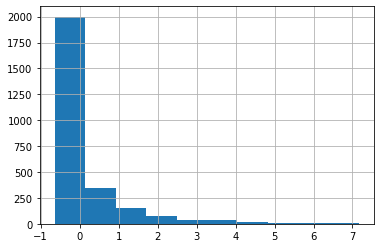

In [29]:
df.views_z.hist()

<AxesSubplot:>

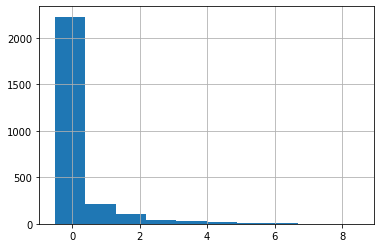

In [30]:
df.likes_z.hist()

/nfs/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


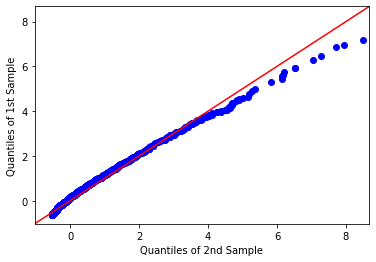

In [22]:
fig = qqplot_2samples(df.views_z, df.likes_z, xlabel=None, ylabel=None,line='45', ax=None)
fig.show()